# 加州房价分析与预测

### 项目简介：
#### 该项目的数据集基于1990年美国加州地区人口普查的数据，数据集记录了加州地区所有以街区为单位的每个区域的人口数量、经纬度、房子总数、收入中位数、房屋价值中位数等10个属性的数据。本项目主要以房屋价值中位数为标签，其余属性为特征，通过使用python编程，利用pyhon相关库，如numpy、pandas、matplotlib等数据处理、分析和可视化库，结合sklearn中相关机器学习模型接口，对加州地区的数据进行探索分析、预处理、特征选择、建模分析、模型评估等完整的机器学习过程，以加深和巩固自己在数据分析和机器学习自学过程中的所学。

### 0.导入相关库

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1.读取数据，并进行数据探索

In [12]:
data_path='../../data/california-housing-prices/housing.csv'


使用pandas的read_csv()函数读取csv格式的数据集，保存格式为DataFrame。读取数据时保留原始数据备份，另行复制一份以免出现难以挽回的操作失误导致数据丢失。

In [13]:
data_init = pd.read_csv(data_path)
data = data_init.copy()

data.head()函数读取数据前5行，data.tail()读取尾部默认5行数据。也可以读取指定行数的数据，将行数传入函数即可,如data.head(10)。

In [14]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


data.info()函数可以查看数据集的总体情况：样本数/特征数（含标签）/特征缺失/特征的数据类型/数据集大小

In [15]:
#可以看出名为’total_bedrooms‘的属性部分值有缺失，后续将考虑填充。此外除'ocean_proximity'为对象类型外，其余属性均为浮点型数值类型。
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


data.describe()函数只针对数值型数据操作，data可以是DataFrame/Series。主要展示数值型数据的部分统计特性，如均值/标准差/最大最小值/上下四分位数等。也可以指定特定百分比的数值，如5%，10%等处的值，此处保持默认参数。

In [16]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 本项目主要研究加州的房价预测问题，所以将房价有关的'median_house_value'属性设置为标签，其余属性为特征

In [17]:
feature=data.drop('median_house_value',axis=1)
label=data['median_house_value']

对标签数据进行探索分析

In [18]:
# 房价中位数在500001.0处的统计最多，共计3842个唯一值,占到总数据长度的18.6%
label.value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [19]:
len(label.unique())/len(label)

0.1861434108527132

对标签使用describe()函数查看统计特性

In [20]:
label.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

绘制标签的直方图，查看数据分布

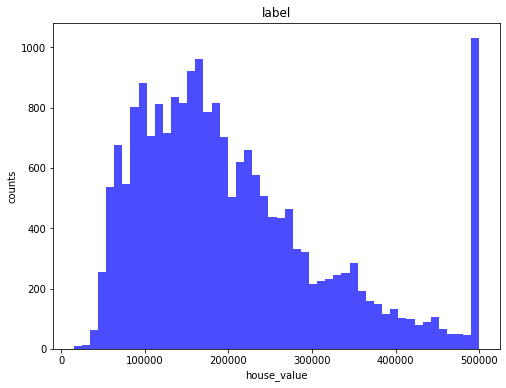

In [21]:
label.hist(bins=50,figsize=(8,6),color='b',alpha=.7)

plt.title('label')
plt.xlabel('house_value')
plt.ylabel('counts')
plt.grid(False)      #不显示网格
plt.show()

对特征数据进行探索分析----绘制数值型属型特征的直方图，展示数据分布情况

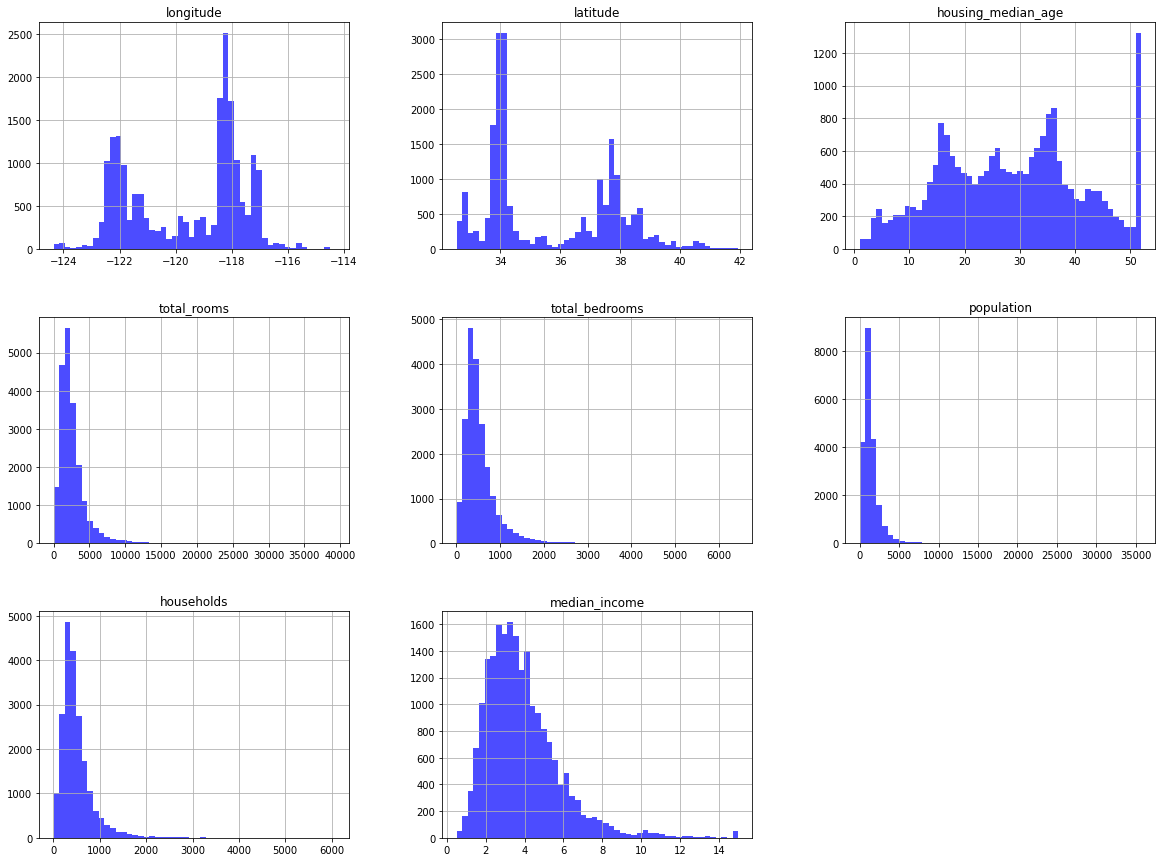

In [22]:
feature.hist(bins=50,figsize=(20,15),color='b',alpha=.7)
plt.show()

除数值型数据外，特征集还有一个数据类型为'object'的特征。

如果只有一个数据类型为'object'的特征，我们可以直接选择它。如果特征数量太多，就不容易从太多特征中刻意找出某种类型的众多特征，所以此处遍历数据的columns属性，再筛选出符合dtype==‘object’的特征。

In [23]:
#筛选出数据类型为'object'的特征
category_list=[column for column in feature.columns if feature[column].dtype=='object']
category_list
feature[category_list]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [24]:
#统计该类别特征的值的分布，因为dataframe格式无法使用value_counts()方法，所以将该特征用series格式呈现
feature.loc[:,category_list[0]].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

文本类型的数据虽然可用于决策树、随机森林等不对特征类型做要求的机器学习算法，但是不转换成数值型数据就无法使用专职于数值型数据的学习算法，譬如线性回归、逻辑回归、K近邻、支持向量机、神经网络等算法。

此步骤为数据探索阶段，暂不对文本数据进行数值型数据的转换操作，后续数据处理阶段再进行。

#### 相关性探索
使用corr()方法很容易计算出每对属性之间的标准相关系数（又称皮尔逊相关系数）,data.corr()输出为dataframe格式,每一列为某个属性与其余属性的相关系数，当然此处也只针对数值型属性计算相关性。

In [25]:
corr = data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


可以单独查看与标签的相关性，可以看出median_income与之相关性较高，这也很好理解：收入高，购买的房价大概率也高。

可根据特征与标签的相关性强度，对特征进行选择。特征选择除相关性方法外，还有方差过滤法（发散程度越小，特征价值越小）、卡方检验、F检验（分类）、t检验（回归）、互信息、封装法、嵌入法等，此处不作详细介绍。

In [26]:
#只考虑相关性大小，不考虑正负，并按照绝对值大小排序
corr['median_house_value'].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

除了考虑现有的特征以外，我们还可以生成新的特征，例如'total_bedrooms'、'population'与标签的相关性都不高，我们可以组合一个新的特征‘bedrooms_per_population’ 由 total_bedrooms/population产生，再看新特征与标签的相关性

In [27]:
#结果显示，bedrooms_per_population的相关性要比total_bedrooms和population各自与标签的相关性都要高
#而bedrooms_per_house的相关性就没有total_bedrooms和households各自与标签的相关性都要高
data_1=data.copy()
data_1['bedrooms_per_population']=data_1['total_bedrooms']/data_1['population']
data_1['bedrooms_per_house']=data_1['total_bedrooms']/data_1['households']
data_1.corr()['median_house_value'].abs().sort_values(ascending=False)

median_house_value         1.000000
median_income              0.688075
latitude                   0.144160
total_rooms                0.134153
housing_median_age         0.105623
bedrooms_per_population    0.069896
households                 0.065843
total_bedrooms             0.049686
bedrooms_per_house         0.046739
longitude                  0.045967
population                 0.024650
Name: median_house_value, dtype: float64

基于上述新特征相较于老特征的高相关性，我们可将'bedrooms_per_population'加入数据集。因total_rooms还存在空值，所以将在后续步骤构建新征'bedrooms_per_population'。

#### 地理数据可视化
特征集有出现经纬度两个属性，可以考虑绘制地理可视化，每个样本其实代表一个类似街道的区域，所以经纬度的散点图可以表征这些街道的地理信息，同时可以选择使用人口特征来表征街道的规模，使用房屋中位数的价格来表征该街道房屋的价值。

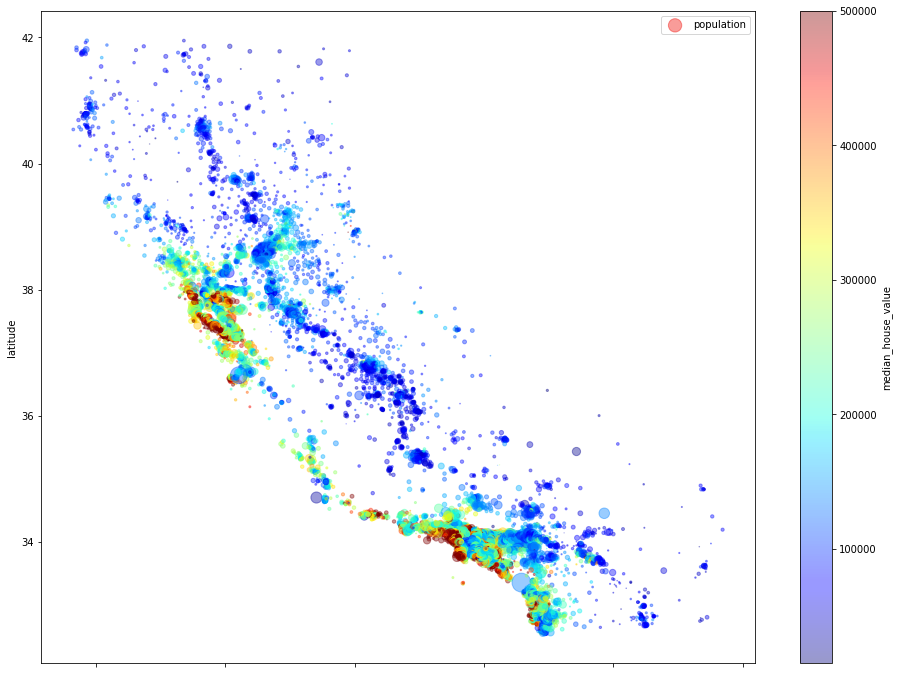

In [28]:
data.plot(kind='scatter',x='longitude',y='latitude'
          ,s=data['population']/100,label='population'#以人口密度值区别散点的大小
          ,alpha=.4                                 #设置小的透明度，会突出颜色更深的点
          ,figsize=(16,12)                           #设置画布大小
          ,c='median_house_value'                   #颜色深度以房价高低衡量
          ,cmap=plt.get_cmap('jet')                 #选择colormap
          ,colorbar=True
         ) 
plt.legend()
plt.show()

#### 以上几步数据探索可以借用pandas_profiling库实现，一行代码搞定数据概览、变量分析、相关性分析等操作

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

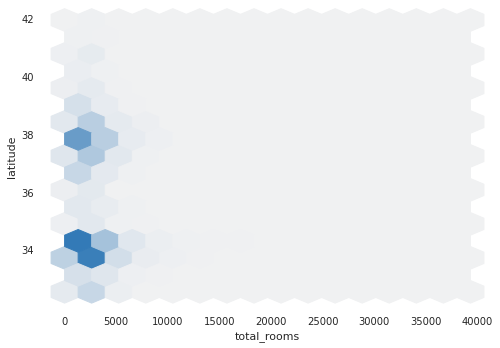

In [30]:
import pandas_profiling #数据探索分析库，简单高效生成交互式数据报告
data_profile=data.profile_report(
    # style={'full_width':True}
    )
data_profile

### 2.数据预处理 

#### 数据集划分，创建训练集和测试集
在将数据喂给机器学习模型前，我们会首先将数据集划分为训练集和测试集，训练集用于训练模型，测试集用于检测模型的性能（分类或回归预测的好坏）。根据测试集模型的性能表现，再对模型加以改进。或选择其他模型、或选择新的特征、亦或者调整超参数，后续再说。

#### 自定义函数用于划分训练集和测试集

In [ ]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled_index = np.random.permutation(len(data))#随机生成指定长度范围内不重复随机数序列
    test_set_size = int(len(data)*test_ratio)
    test_index = shuffled_index[:test_set_size]
    train_index = shuffled_index[test_set_size:]
    return data.iloc[train_index],data.iloc[test_index]

In [ ]:
test_ratio=0.2
train_set,test_set=split_train_test(data,test_ratio)
print(len(train_set),'train_set',len(test_set),'test_set')

16512 train_set 4128 test_set


#### 使用sklearn中的train_test_split函数划分训练集和数据集
可以直接对包含标签的数据集划分为训练集和测试集

In [ ]:
from sklearn.model_selection import train_test_split
train_f,test_f = train_test_split(data,test_size=0.2,random_state=42)#添加随机种子保证每次运行划分的都是一样的结果

也可以对分离的特征集和标签集划分为训练集的特征和标签、测试集的特征和标签

In [ ]:
train_x,test_x,train_y,test_y= train_test_split(feature,label,test_size=0.2,random_state=42)

#### 分层抽样划分训练集和测试集 （根据相关程度较高的特征作为分层抽样依据）
分层抽样可以让训练集合测试集在某个重要特征上表现出相似的数据分布。相关矩阵显示，‘median_house_value’与房价的相关性较高，因此选择‘median_house_value’作为分层抽样的划分依据

In [ ]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

由于收入中位数是连续值，需将其离散化创建一个收入类别特征

median_income均值3.87，标准差1.9，所以收入中位数有68%的样本落入在2-6万区间（将其近似看作正太分布），与下图的直方图比较吻合

In [ ]:
data['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

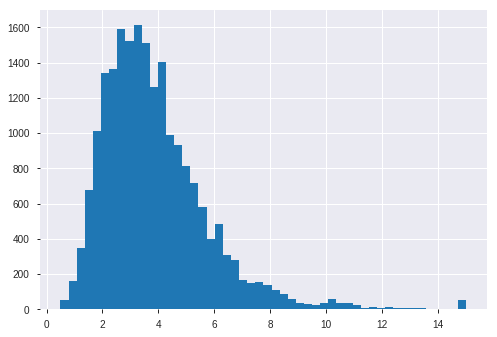

In [ ]:
plt.figure()
plt.hist(data['median_income'],bins=50)
# plt.grid()
plt.show()

In [ ]:
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5,5.0,inplace=True)# series.where(),小于5则保持原样，大于5赋值为5.0
data['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

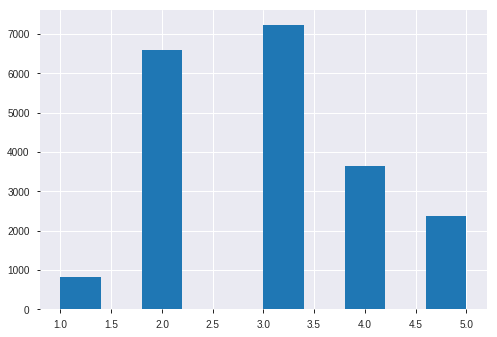

In [ ]:
plt.figure()
plt.hist(data['income_cat'])
# plt.grid()
plt.show()

### 使用sklearn中的StratifiedShuffleSplit进行分层抽样

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1       #进行一次划分
                               ,test_size=0.2    #测试集占比0.2
                               ,random_state=42  #设置随机种子保证每次运行划分的数据集不会发生变化
                              )
for train_index,test_index in split.split(data
                                          ,data['income_cat']#选择分层抽样依据的属性（或特征）
                                         ):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

#### 不同抽样方法的数据分布比较

#### 分层抽样的‘income_cat’分布

In [ ]:
x_strat=strat_train_set['income_cat'].value_counts(normalize=True)
x_strat

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

#### 全分布数据集中‘income_cat’分布

In [ ]:
x_full=data['income_cat'].value_counts(normalize=True)
x_full

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

#### 使用train_test_split随机划分的数据集‘income_cat’分布

In [ ]:
train_rand,test_rand=train_test_split(data,test_size=0.2,random_state=42)
x_rand=train_rand['income_cat'].value_counts(normalize=True)
x_rand

3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64

对全样本、分层抽样、随机抽样三种数据分布进行比较，发现分层抽样可以和全样本在数据的统计分布上相差较小，而随机抽样的数据分布与全样本的分布偏差相较于分层抽样的偏差要大。

In [ ]:
strat_bia=(x_strat-x_full)/x_full*100
rand_bia=(x_rand-x_full)/x_full*100
compare=pd.DataFrame([x_full,x_strat,x_rand,strat_bia,rand_bia],index=['x_full','x_strat','x_rand','strat_bia_%','rand_bia_%']).T
compare

,x_full,x_strat,x_rand,strat_bia_%,rand_bia_%
3.0,0.350581,0.350594,0.348595,0.003455,-0.566611
2.0,0.318847,0.318859,0.317466,0.003799,-0.433065
4.0,0.176308,0.176296,0.178537,-0.006870,1.264084
5.0,0.114438,0.114402,0.115673,-0.031753,1.079594
1.0,0.039826,0.039850,0.039729,0.060827,-0.243309


创建的收入类比特征主要用于分层抽样，如果不保留，可以删除

In [ ]:
for set in (strat_train_set,strat_test_set):
    set.drop(['income_cat'],axis=1)
    

### 机器学习算法的数据准备阶段

#### 数据清理 :清理缺失值（清理特征或样本）/填充缺失值（0,均值，中位数，机器学习模型填充等）

In [ ]:
data1=data.drop('income_cat',axis=1)

In [ ]:
data1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

几种简单数据清理的方法，此处我们选择中位数填充法

In [ ]:
# hdata.drop(['total_bedrooms'],axis=1,inplace=True)
#data.dropna(subset=['total_bedrooms'])
data_median_fill=data1.fillna(data1.median())
data_median_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 使用sklearn中的SimpleImputer,对缺失值统一填充,只能对数值型数据操作

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')#以中位数填充缺失值
data_num=data.drop('ocean_proximity',axis=1)
columns=data_num.columns
data_num=imputer.fit_transform(data_num)
data_num=pd.DataFrame(data_num,columns=columns)


#### 新特征的产生

还记得之前的新特征'bedrooms_per_population'吗？之前因为没有处理total_bedrooms中的缺失值就没添加新特征。此步我们将其纳入数据集中

In [ ]:
data_median_fill['bedrooms_per_population']=data_median_fill['total_bedrooms']/data_median_fill['population']

#### 到此，虽然我们还没对数值型特征进行标准化，对文本类特征进行数字编码等操作，但是我们已经可以把数据喂给机器学习模型(暂时先不将文本类型输入模型中)，如决策数、随机森林等。

In [ ]:
#分层抽样,这里我们将先前分层抽样的几步抽象成一个函数，传入要分层抽样的数据集和分层抽样的特征，返回训练集和测试集
def stratifiedshufflesplit(data_,feature='median_income'):
    data_['cat'] = np.ceil(data_[feature]/1.5)           #此处我们默认使用收入中位数作为分层抽样的依据
    data_['cat'].where(data_['cat']<5,5.0,inplace=True)

    from sklearn.model_selection import StratifiedShuffleSplit
    split_ = StratifiedShuffleSplit(n_splits=1   #进行一次划分
                               ,test_size=0.2    #测试集占比0.2
                               ,random_state=42  #设置随机种子保证每次运行划分的数据集不会发生变化
                              )
    for train_index,test_index in split.split(data_
                                          ,data_['cat']#选择分层抽样依据的属性（或特征）
                                         ):
        strat_train=data_.loc[train_index]
        strat_test=data_.loc[test_index]
        strat_train=strat_train.drop('cat',axis=1)
        strat_test=strat_test.drop('cat',axis=1)
    data_.drop('cat',axis=1,inplace=True)
    return strat_train,strat_test

strat_train,strat_test=stratifiedshufflesplit(data_median_fill,feature='median_income')

train_x,train_y=strat_train.drop(['median_house_value','ocean_proximity'],axis=1),strat_train['median_house_value']
test_x,test_y=strat_test.drop(['median_house_value','ocean_proximity'],axis=1),strat_test['median_house_value']

决策树模型

回归模型的评判标准，此处用均方根误差来衡量。均方根误差越小，说明预测值与实际值越接近。

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=10)
dtr=dtr.fit(train_x,train_y)

from sklearn.metrics import mean_squared_error
predict=dtr.predict(test_x)
mse=mean_squared_error(test_y,predict)
rmse1=np.sqrt(mse)
rmse1

61279.907943502956

随机森林回归模型

随机森立的结果明显好于决策树

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor(n_estimators=10,max_depth=10,random_state=0)
rfg=rfg.fit(train_x,train_y)

predicts=rfg.predict(test_x)
mse_=mean_squared_error(test_y,predicts)
rmse_2=np.sqrt(mse_)
rmse_2

54115.91279529466

#### 考虑将数值型特征标准化或归一化，以及文本类型数据进行数值化编码操作
先将数据集中的数值型特征和文本类型特征区分开

In [ ]:
data2=data_median_fill.copy()
data2_num=data2.drop(['ocean_proximity','median_house_value'],axis=1)
data2_cat=data2['ocean_proximity']
data2_label=data2['median_house_value']

使用OneHotEncoder对文本数据进行编码。注意传入实例的数据必须是二维数据，单独的series需转换成二维数组或DataFrame格式

In [ ]:
from sklearn.preprocessing import OneHotEncoder
data2_cat=pd.DataFrame(data2_cat)

encoder=OneHotEncoder(categories='auto')
data2_cat_onehot=encoder.fit_transform(data2_cat).toarray()    #输出是稀疏矩阵的一种存储方式，需转换成数组

#独热编码实例的学习参数，显示多个文本类型数据在编码前的文本值数组，每一个文本特征存储一个数组
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
data2_cat_onehot=pd.DataFrame(data2_cat_onehot,columns=encoder.categories_)
data2_cat_onehot.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


数值型特征的列名

In [ ]:
columns_list=data2_num.columns.tolist()

独热编码后的文本类特征列名加入到数值特征列名的列表中，表示全部特征的列名

In [ ]:
columns_list.extend(encoder.categories_[0].tolist())
columns_list

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_population',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

#### 数值型特征归一化
归一化：Y=(X-Y.min())/(Y.max()-Y.min())

In [ ]:
data2_num = data2_num.sub(data2_num.min())/(data2_num.max()-data2_num.min())

使用describe()可以看出所有数值型特征均进行了归一化，数值范围[0,1]

In [ ]:
data2_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_population
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083153,0.039869,0.081983,0.232464,0.028452
std,0.199555,0.226988,0.246776,0.055486,0.065083,0.031740,0.062873,0.131020,0.018139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308,0.022157
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,0.026172
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641,0.031203
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data2_num_onehot=pd.DataFrame(np.c_[data2_num,data2_cat_onehot],columns=columns_list)#np.c_[]数组横向拼接成数组,np.r_[]纵向拼接
data2_num_onehot

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_population,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.028178,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.032407,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.026941,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.029624,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.034868,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.031136,0.0,1.0,0.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.029638,0.0,1.0,0.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.033885,0.0,1.0,0.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.038840,0.0,1.0,0.0,0.0,0.0


In [ ]:
data2=pd.concat([data2_num_onehot,data2_label],axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
longitude                  20640 non-null float64
latitude                   20640 non-null float64
housing_median_age         20640 non-null float64
total_rooms                20640 non-null float64
total_bedrooms             20640 non-null float64
population                 20640 non-null float64
households                 20640 non-null float64
median_income              20640 non-null float64
bedrooms_per_population    20640 non-null float64
<1H OCEAN                  20640 non-null float64
INLAND                     20640 non-null float64
ISLAND                     20640 non-null float64
NEAR BAY                   20640 non-null float64
NEAR OCEAN                 20640 non-null float64
median_house_value         20640 non-null float64
dtypes: float64(15)
memory usage: 2.4 MB


使用分层抽样划分训练集合测试集

In [ ]:
strat_train,strat_test=stratifiedshufflesplit(data2,feature='median_income')

train_x,train_y=strat_train.drop(['median_house_value'],axis=1),strat_train['median_house_value']
test_x,test_y=strat_test.drop(['median_house_value'],axis=1),strat_test['median_house_value']

归一化和独热编码前后决策树表现分别为

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=10)
dtr=dtr.fit(train_x,train_y)

from sklearn.metrics import mean_squared_error
predict=dtr.predict(test_x)
mse=mean_squared_error(test_y,predict)
rmse3=np.sqrt(mse)
print('独热编码前后决策树表现分别为：\n前：{}，\n后：{}'.format(rmse1,rmse3))

独热编码前后决策树表现分别为：
前：61279.907943502956，
后：62619.46640205833


模型的学习参数dtr.feature_importances_显示特征重要性,所有特征重要性之和为1

In [ ]:
dtr.feature_importances_

array([5.47043134e-02, 4.71058888e-02, 4.02016244e-02, 6.00118120e-03,
       5.27264625e-03, 6.88288063e-03, 9.56807672e-03, 5.38186544e-01,
       1.19979961e-01, 1.93694423e-04, 1.69624473e-01, 0.00000000e+00,
       1.65589192e-04, 2.11312829e-03])

重要特征及其重要百分比

In [ ]:
feature_sort_dtr=list(zip(dtr.feature_importances_,train_x.columns))#重要性在前，排序按照元祖对第一个元素排序
sorted(feature_sort_dtr,reverse=True)

[(0.538186543577296, 'median_income'),
 (0.1696244726973514, 'INLAND'),
 (0.11997996052239095, 'bedrooms_per_population'),
 (0.054704313385669084, 'longitude'),
 (0.04710588875737084, 'latitude'),
 (0.040201624357709784, 'housing_median_age'),
 (0.009568076715195014, 'households'),
 (0.006882880634210759, 'population'),
 (0.006001181195331081, 'total_rooms'),
 (0.005272646254137518, 'total_bedrooms'),
 (0.0021131282884965406, 'NEAR OCEAN'),
 (0.00019369442306393955, '<1H OCEAN'),
 (0.00016558919177730446, 'NEAR BAY'),
 (0.0, 'ISLAND')]

In [ ]:
corr['median_house_value'].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

最好的特征是median_income,这与数据探索分析阶段的相关性的重要程度不谋而合

In [ ]:
train_x.columns[np.argmax(dtr.feature_importances_)]

'median_income'

归一化和独热编码前后随机森林表现分别为

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor(n_estimators=10,max_depth=10)
rfg=rfg.fit(train_x,train_y)

predicts=rfg.predict(test_x)
mse_=mean_squared_error(test_y,predicts)
rmse_4=np.sqrt(mse_)
print('独热编码前后随机森林表现分别为：\n前：{}，\n后：{}'.format(rmse_2,rmse_4))

独热编码前后随机森林表现分别为：
前：54115.91279529466，
后：55163.42038230227


In [ ]:
feature_sort_rfg=list(zip(rfg.feature_importances_,train_x.columns))
sorted(feature_sort_rfg,reverse=True)

[(0.5370220116862772, 'median_income'),
 (0.15968350358206598, 'INLAND'),
 (0.11867520791432255, 'bedrooms_per_population'),
 (0.054343058214779305, 'longitude'),
 (0.05014047288659925, 'latitude'),
 (0.04299762670734415, 'housing_median_age'),
 (0.010850947678967902, 'households'),
 (0.009476323770208357, 'total_rooms'),
 (0.007699492968768466, 'total_bedrooms'),
 (0.0060709729215546755, 'population'),
 (0.0017898174436695366, 'NEAR OCEAN'),
 (0.0007040917290514589, '<1H OCEAN'),
 (0.000546472496391183, 'NEAR BAY'),
 (0.0, 'ISLAND')]

In [ ]:
train_x.columns[np.argmax(rfg.feature_importances_)]

'median_income'

#### 保存模型 
使用python的pickel模块或者sklearn.externals.joblib

In [ ]:
# pip install joblib 直接安装joblib,无需从sklearn.externals模块导入

In [ ]:
# from sklearn.externals import joblib
import joblib
joblib.dump(dtr,'dtr.pkl')
joblib.dump(rfg,'rfg.pkl')

['rfg.pkl']

保存的模型和之前的dtr模型参数一致

In [ ]:
dtr_load=joblib.load('dtr.pkl')
dtr_load

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
dtr

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

模型的装载

In [ ]:
rfg_load=joblib.load('rfg.pkl')
rfg_load

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### 参数调整
网格搜索法寻找最佳参数组合

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid=dict(n_estimators=[10,30],max_depth=[4,6,8,10],min_samples_split=[2,3,4],min_samples_leaf=[2,3,4])
rfg_gs=RandomForestRegressor()
grid_search=GridSearchCV(rfg_gs,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10],
   

网格搜索属性best_params_，显示最佳学习参数

In [ ]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 30}

最好的估算器

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

网格搜索每一个参数的结果

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.25586386, 0.76218739, 0.2581512 , 0.75587988, 0.25191727,
        0.75805974, 0.25354481, 0.76766882, 0.25338435, 0.76091442,
        0.25307198, 0.75556803, 0.25316887, 0.75755472, 0.25410814,
        0.75868592, 0.25489421, 0.76283312, 0.36640716, 1.09667149,
        0.36551547, 1.10105453, 0.36946378, 1.10261774, 0.36876364,
        1.08960786, 0.36757832, 1.12085414, 0.37261696, 1.10239367,
        0.36609082, 1.08046908, 0.36213765, 1.08785806, 0.36934738,
        1.08903799, 0.46674819, 1.39514837, 0.46796651, 1.40423164,
        0.46501894, 1.42549882, 0.47641029, 1.40813165, 0.46883779,
        1.41463656, 0.46557097, 1.40194511, 0.4731173 , 1.39174004,
        0.46905651, 1.39902477, 0.47392645, 1.3852972 , 0.56904526,
        1.67654705, 0.55674882, 1.70360031, 0.56471968, 1.69221654,
        0.55991478, 1.67165446, 0.56055565, 1.66307774, 0.55422473,
        1.68273506, 0.55834169, 1.78397317, 0.55568571, 1.66188941,
        0.56264482, 1.66592264]

保存最好的模型估算器

In [ ]:
best_model=grid_search.best_estimator_
joblib.dump(best_model,'best_model_rfg.pkl')

['best_model_rfg.pkl']

In [ ]:
test_predictions=best_model.predict(test_x)
test_mse=mean_squared_error(test_y,test_predictions)
test_rmse=np.sqrt(test_mse)

In [ ]:
test_rmse

54267.49473622389

In [ ]:
best_model.feature_importances_

array([5.15505107e-02, 4.82893953e-02, 4.49145383e-02, 6.40048528e-03,
       6.51778963e-03, 6.89047547e-03, 9.29597799e-03, 5.43444718e-01,
       1.18998629e-01, 5.23090010e-04, 1.60544966e-01, 0.00000000e+00,
       5.34090796e-04, 2.09533324e-03])

In [ ]:
best_model.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
best_model.set_params()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

对估算器的个数进行细化调整，在30附近扩大范围

In [ ]:
param_grid=dict(n_estimators=list(range(20,41)),max_depth=[10],min_samples_split=[3],min_samples_leaf=[4])
rfg_gs_estimator=RandomForestRegressor()
grid_search=GridSearchCV(rfg_gs_estimator,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10], 'min_samples

In [ ]:
test_predictions=grid_search.predict(test_x)
test_mse=mean_squared_error(test_y,test_predictions)
test_rmse=np.sqrt(test_mse)
test_rmse

53768.89611321778

In [ ]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 31}

In [ ]:
best_model_1=grid_search.best_estimator_
joblib.dump(best_model_1,'best_model_1.pkl')

['best_model_1.pkl']